In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
trees_gdf = gpd.read_file('./datasets/others/trees.geojson')
green_areas_gdf = gpd.read_file('./datasets/others/green-areas.geojson')
zipcode_area_gdf = gpd.read_file('./datasets/others/eindhoven-zipcode.geojson')

In [3]:
zipcode_area_gdf = zipcode_area_gdf.to_crs(3857)
zipcode_area_gdf['area'] = zipcode_area_gdf.area / 10**6

In [4]:
trees_gdf = trees_gdf.to_crs(3857)

In [5]:
green_areas_gdf = green_areas_gdf.to_crs(3857)

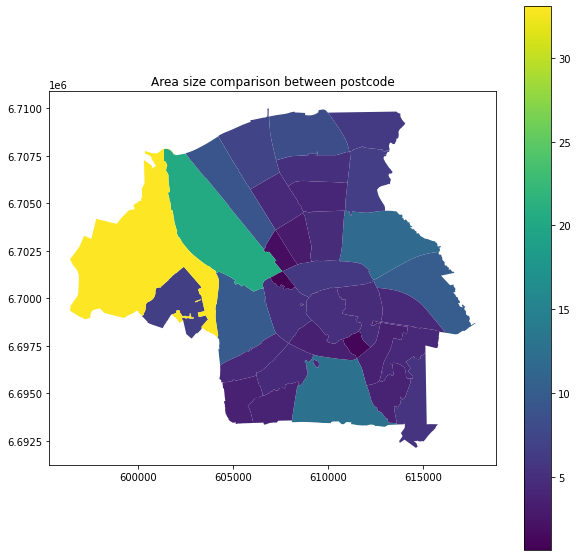

In [6]:
fig, ax = plt.subplots(figsize=(10, 10))

zipcode_area_gdf.plot("area", legend=True, ax=ax)

plt.title("Area size comparison between postcode")
plt.show()

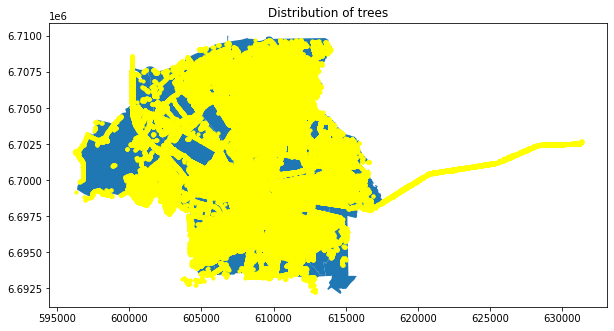

In [7]:
fig, ax = plt.subplots(figsize=(10, 10))
zipcode_area_gdf.plot(ax=ax)
trees_gdf.plot(markersize=10, ax=ax, color='yellow')

plt.title("Distribution of trees")
plt.show()

<AxesSubplot:>

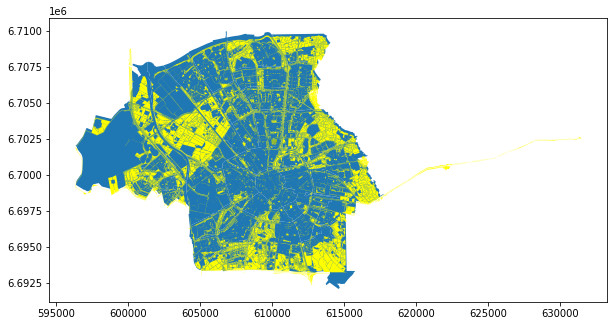

In [8]:
fig, ax = plt.subplots(figsize=(10, 10))

zipcode_area_gdf.plot(ax=ax)
green_areas_gdf.plot(ax=ax, color='yellow')

In [11]:
trees_gdf['val'] = 1
pointsInPolygon = gpd.sjoin(trees_gdf, zipcode_area_gdf, how="inner", predicate='intersects')

In [12]:
trees_per_area_df = pointsInPolygon.groupby('pc4_code').val.sum().to_frame()
trees_per_area_df = trees_per_area_df.rename(columns={0: "total"})

In [13]:
green_areas_gdf['val'] = 1
pointsInPolygon = gpd.sjoin(green_areas_gdf, zipcode_area_gdf, how="inner", predicate='intersects')

In [14]:
green_areas_per_area = pointsInPolygon.groupby('pc4_code').val.sum().to_frame()
green_areas_per_area = green_areas_per_area.rename(columns={0: "total"})

In [15]:
trees_per_area_df

,val
pc4_code,
5611,2996
5612,2377
5613,2233
5614,616
5615,2482
5616,3356
5617,456
5621,832
5622,2366


In [16]:
green_areas_per_area

,val
pc4_code,
5611,1638
5612,1205
5613,991
5614,190
5615,1069
5616,1709
5617,103
5621,610
5622,1230


In [17]:
trees_per_area_df.to_csv('./datasets/others/total_trees_per_area.csv', index=True)
green_areas_per_area.to_csv('./datasets/others/total_green_areas_per_area.csv', index=True)